One of the biggest contention among different football clubs, and one which perpetuates into a lot of banter, is playing styles. In this blog post, we will try to quantify and visualize things which football fans keep talking about on the weekends - how much does Mourinho really park the bus, etc.

We'll be using a subset of the [European Soccer Dataset](https://www.kaggle.com/hugomathien/soccer) available on [Kaggle](http://kaggle.com/).

## Data Preparation

Let's start by taking a look at our data. The data for attributes of teams (playing styles) is given in the table Team_Attributes, while metadata about the team is in "Team" table.

In [3]:
import pandas as pd
import sqlite3

con = sqlite3.connect("./database.sqlite")
team=pd.read_sql_query('select * from Team',con)
team_attr=pd.read_sql_query('select * from Team_Attributes',con)
con.close()

In [4]:
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [5]:
team_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


The team's attributes are constantly updated accross time, and we can access the historical record of their playing styles through the 'date' column. For now, we are interested in the most recent playing style of the teams. So, we'll merge these 2 tables and keep the latest attribute record for each team. Also, we'll remove the NaN entries and the unnecessary columns.

In [6]:
df = pd.merge(team, team_attr, how='inner', left_on='team_api_id', right_on='team_api_id')
aggs = df.groupby('team_long_name')['date'].max().to_frame()
df.drop('date', axis=1, inplace=True)
df.drop_duplicates(subset='team_long_name', keep='last', inplace=True)
df = df.merge(right=aggs, right_index=True, left_on='team_long_name', how='right')
df = df.dropna()
df.set_index('team_long_name', inplace=True)
df.drop(['date', 'id_x', 'id_y', 'team_api_id', 'team_fifa_api_id_y', 'team_fifa_api_id_x', 'team_short_name'], axis=1, inplace=True)
print (df.shape)

(260, 21)


In [7]:
df.columns

Index([u'buildUpPlaySpeed', u'buildUpPlaySpeedClass', u'buildUpPlayDribbling',
       u'buildUpPlayDribblingClass', u'buildUpPlayPassing',
       u'buildUpPlayPassingClass', u'buildUpPlayPositioningClass',
       u'chanceCreationPassing', u'chanceCreationPassingClass',
       u'chanceCreationCrossing', u'chanceCreationCrossingClass',
       u'chanceCreationShooting', u'chanceCreationShootingClass',
       u'chanceCreationPositioningClass', u'defencePressure',
       u'defencePressureClass', u'defenceAggression',
       u'defenceAggressionClass', u'defenceTeamWidth',
       u'defenceTeamWidthClass', u'defenceDefenderLineClass'],
      dtype='object')

So, we have a total of 260 clubs, with 21 attributes for each one. For now, we'll remove the categorical columns and focus only on the continuous ones.

In [8]:
cols_to_keep = [u'buildUpPlaySpeed', u'buildUpPlayDribbling',
         u'buildUpPlayPassing', u'chanceCreationPassing', u'chanceCreationCrossing',
       u'chanceCreationShooting', u'defencePressure', u'defenceAggression', u'defenceTeamWidth']
df = df[cols_to_keep]

## Looking at the data

Lets look at the data of some of the major clubs.

In [9]:
team_names = ['Liverpool', 'Manchester United', 'Arsenal', 'Chelsea', 'Real Madrid CF', 'FC Barcelona']
df.loc[team_names]

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_long_name,,,,,,,,,
Liverpool,66,60.0,45,34,34,46,51,52,61
Manchester United,38,42.0,44,49,44,40,54,53,56
Arsenal,59,51.0,30,28,44,46,51,44,52
Chelsea,67,41.0,36,41,34,44,39,41,46
Real Madrid CF,50,57.0,46,61,41,63,52,60,63
FC Barcelona,36,35.0,51,36,49,56,61,65,65


Some trivial insights that we can tell from this data : Liverpool, Chelsea and Arsenal seem to rely more on quick build up play, while Real Madrid rely on a lot of passing and shooting in the final third for chance creation. Barcelona, as expected, do lots of passing in their build up play. They also press a lot (indicated by high values of 'defencePressure' and 'defenceAggresion'), as do Manchester United.

Let's visualize some of these attributes. We'll start with "buildUpPlayDribbling" and "buildUpPlayPassing".

('Liverpool', 23)
('Manchester United', 18)
('Arsenal', 20)
('Chelsea', 36)
('Real Madrid CF', 222)
('FC Barcelona', 224)


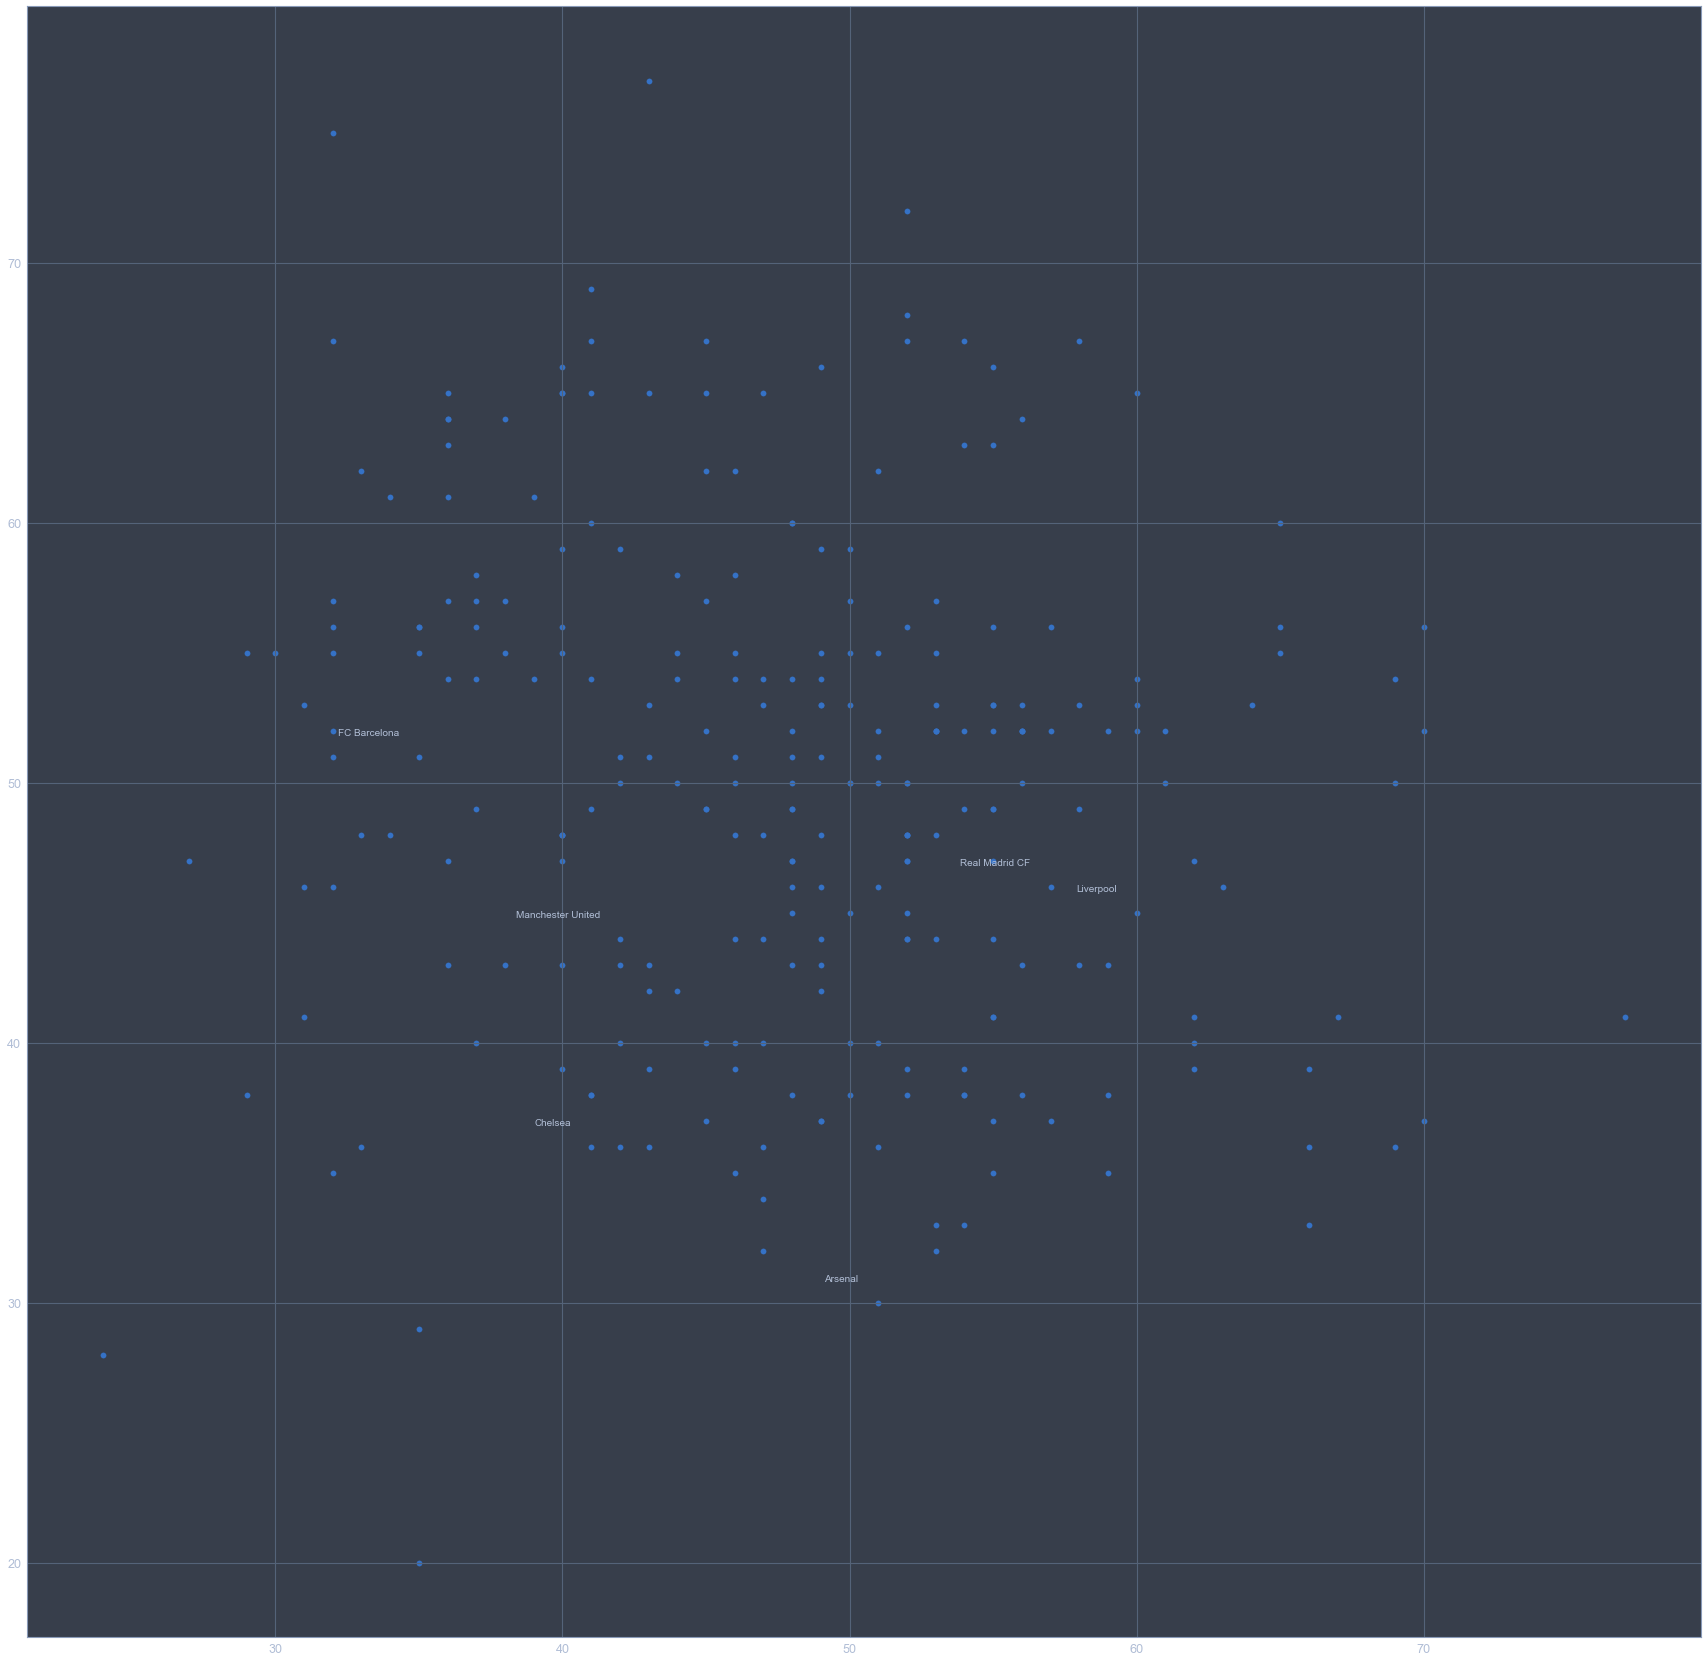

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (30,30)
team_maps = {}
for team in team_names:
    print (team, df.index.get_loc(team))
    team_maps[team] = df.index.get_loc(team)
    
plt.figure()
plt.scatter(df['buildUpPlayDribbling'], df['buildUpPlayPassing'])
for i, x, y in zip(range(len(df['buildUpPlayDribbling'])), df['buildUpPlayDribbling'], df['buildUpPlayPassing']): 
    if i in team_maps.values():
        for team in team_maps.items():
            if team[1]==i:
                team_name = team[0]
        plt.annotate(team_name, xy=(x,y), xytext=(-20,20), textcoords='offset points', ha='right', va='bottom')
    
plt.show()


In [ ]:
Since 

## Dimensionality Reduction